#Introduction

**Overview**

The assessment is to apply a KNearestNeighbor Classifier to predict the people on the titanic ship who survived and who did not.

**Metric of Success**

The measure of success will lay in the ability of the model to predict whether a passenger survives or not given new data.

**Dataset**

The dataset used here can be found here: [link text](https://archive.org/download/train5_202002/train%20%285%29.csv)

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# load the data
ttt = pd.read_csv("train.csv")
ttt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# missing values
ttt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# dealing with missing values in age
ttt['Age'].fillna(ttt['Age'].mean(), inplace=True)
ttt['Parch'].fillna(ttt['Parch'].median(), inplace=True)
ttt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# dropping irrelevant columns
# ---
#
ttt.drop(['PassengerId','Pclass','Name','Ticket','Cabin', 'Embarked'], axis=1, inplace=True)
ttt.head()

,Survived,Sex,Age,SibSp,Parch,Fare
0,0,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,1,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,0,male,35.0,0,0,8.0500


In [ ]:
ttt['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
# check for outliers
# ---
#
Q1 = ttt.quantile(q=0.25)
Q3 = ttt.quantile(q=0.75)

IQR = Q3 - Q1
print(IQR)

Survived     1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
dtype: float64


In [ ]:
# removing the outliers
# ---
#
ttt[~((ttt < (Q1 - 1.5 * IQR)) |(ttt > (Q3 + 1.5 * IQR))).any(axis=1)]

,Survived,Sex,Age,SibSp,Parch,Fare
0,0,male,22.000000,1,0,7.2500
2,1,female,26.000000,0,0,7.9250
3,1,female,35.000000,1,0,53.1000
4,0,male,35.000000,0,0,8.0500
5,0,male,29.699118,0,0,8.4583
...,...,...,...,...,...,...
884,0,male,25.000000,0,0,7.0500
886,0,male,27.000000,0,0,13.0000
887,1,female,19.000000,0,0,30.0000
889,1,male,26.000000,0,0,30.0000


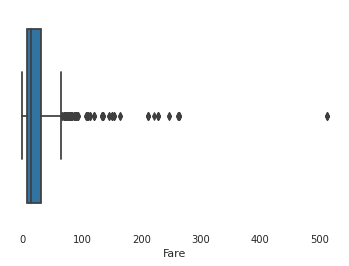

In [ ]:
# outlier fare box plot 
# ---
#
sns.boxplot(x=ttt['Fare'])

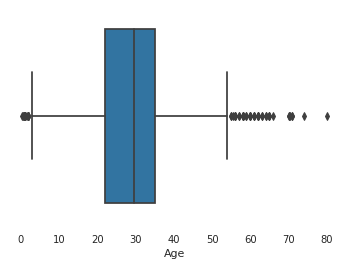

In [ ]:
# outlier Age box plot 
# ---
#
sns.boxplot(x=ttt['Age'])

In [ ]:
# statistical description
# ---
#
ttt.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,13.002015,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# shape
# ---
#
ttt.shape

(891, 6)

In [ ]:
# size 
# ---
#
ttt.size

5346

In [ ]:
# check for duplicates
print(ttt.duplicated().any())
print(ttt.duplicated().sum())

True
115


In [ ]:
# drop duplicates
ttt.drop_duplicates(inplace=True)
print(ttt.duplicated().any())
print(ttt.duplicated().sum())

False
0


In [ ]:
# data set info
ttt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  776 non-null    int64  
 1   Sex       776 non-null    object 
 2   Age       776 non-null    float64
 3   SibSp     776 non-null    int64  
 4   Parch     776 non-null    int64  
 5   Fare      776 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 42.4+ KB


#Exploratory Data Analysis

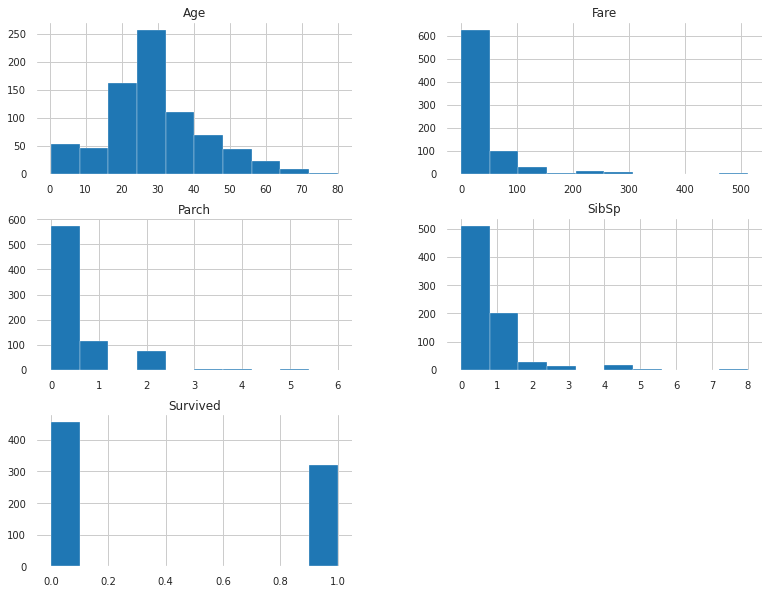

In [ ]:
# plotting histograms
ttt.hist(bins=10, figsize=(13,10))
plt.show()

In [ ]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [ ]:
from pandas_profiling import ProfileReport

# generate report
#
profile = ProfileReport(ttt)
profile

In [ ]:
# correlation
# ---
#
ttt.corr()

,Survived,Age,SibSp,Parch,Fare
Survived,1.000000,-0.078283,-0.038620,0.069020,0.246388
Age,-0.078283,1.000000,-0.280523,-0.187390,0.090413
SibSp,-0.038620,-0.280523,1.000000,0.379748,0.132810
Parch,0.069020,-0.187390,0.379748,1.000000,0.189905
Fare,0.246388,0.090413,0.132810,0.189905,1.000000


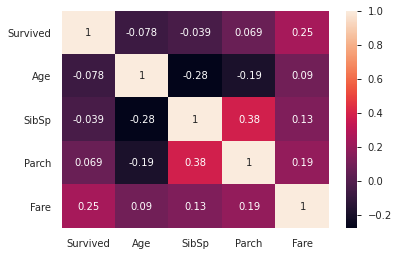

In [ ]:
# correlation heatmap
# ---
#
sns.heatmap(data=ttt.corr(), annot=True)
plt.show()

#Classifier

In [ ]:
# Performing KNN Classifier
# ---
#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
ttt.head()

,Survived,Sex,Age,SibSp,Parch,Fare
0,0,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,1,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,0,male,35.0,0,0,8.0500


In [ ]:
# encoding sex data
#
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ttt['Sex']= label_encoder.fit_transform(ttt['Sex']) 

In [ ]:
ttt.head()

,Survived,Sex,Age,SibSp,Parch,Fare
0,0,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,1,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,0,1,35.0,0,0,8.0500


In [ ]:
# Getting my features and labels
# ---
#
X = ttt.iloc[:,1:].values
y = ttt.iloc[:,0].values

In [ ]:
# Split into train test splits -- 80/20
# ---
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=10)

In [ ]:
# KNN Classifier
# ---
# Base without any tuning
#
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
# Testing the scores
# ---
#
print(f'The train set score accuracy: {knn.score(X_train, y_train)}')
print(f'The test set score accuracy: {knn.score(X_test, y_test)}')

The train set score accuracy: 0.7790322580645161
The test set score accuracy: 0.6923076923076923


In [ ]:
# Performance Metrics
# ---
#
print('-------- Confusion Matrix --------')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print('-------- Classification Report --------')

cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

-------- Confusion Matrix --------
[[71 23]
 [25 37]]

-------- Classification Report --------
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        94
           1       0.62      0.60      0.61        62

    accuracy                           0.69       156
   macro avg       0.68      0.68      0.68       156
weighted avg       0.69      0.69      0.69       156



In [ ]:
# Split into train test splits -- 70/30
# ---
#
from sklearn.model_selection import train_test_split
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X,y,test_size=0.30, random_state=10)

In [ ]:
# KNN Classifier
# ---
# Base without any tuning
#
knn_70 = KNeighborsClassifier(n_neighbors=5)
knn_70.fit(X_train_70, y_train_70)

y_pred_70 = knn.predict(X_test_70)

In [ ]:
# Testing the scores
# ---
#
print(f'The train set score accuracy: {knn_70.score(X_train_70, y_train_70)}')
print(f'The test set score accuracy: {knn_70.score(X_test_70, y_test_70)}')

The train set score accuracy: 0.7697974217311234
The test set score accuracy: 0.6523605150214592


In [ ]:
# Performance Metrics
# ---
#
print('-------- Confusion Matrix --------')
cm = confusion_matrix(y_test_70, y_pred_70)
print(cm)
print()
print('-------- Classification Report --------')

cl_rep = classification_report(y_test_70, y_pred_70)
print(cl_rep)

-------- Confusion Matrix --------
[[103  27]
 [ 39  64]]

-------- Classification Report --------
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       130
           1       0.70      0.62      0.66       103

    accuracy                           0.72       233
   macro avg       0.71      0.71      0.71       233
weighted avg       0.72      0.72      0.71       233



In [ ]:
# Split into train test splits -- 60/40
# ---
#
from sklearn.model_selection import train_test_split
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X,y,test_size=0.40, random_state=10)

In [ ]:
# KNN Classifier
# ---
# Base without any tuning
#
knn_40 = KNeighborsClassifier(n_neighbors=5)
knn_40.fit(X_train_40, y_train_40)

y_pred_40 = knn.predict(X_test_40)

In [ ]:
# Testing the scores
# ---
#
print(f'The train set score accuracy: {knn_40.score(X_train_40, y_train_40)}')
print(f'The test set score accuracy: {knn_40.score(X_test_40, y_test_40)}')

The train set score accuracy: 0.7763440860215054
The test set score accuracy: 0.6591639871382636


In [ ]:
# Performance Metrics
# ---
#
print('-------- Confusion Matrix --------')
cm = confusion_matrix(y_test_40, y_pred_40)
print(cm)
print()
print('-------- Classification Report --------')

cl_rep = classification_report(y_test_40, y_pred_40)
print(cl_rep)

-------- Confusion Matrix --------
[[136  36]
 [ 49  90]]

-------- Classification Report --------
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       172
           1       0.71      0.65      0.68       139

    accuracy                           0.73       311
   macro avg       0.72      0.72      0.72       311
weighted avg       0.73      0.73      0.72       311



#Implementing Optimization for Model Performance

In [ ]:
# Split into train test splits -- 80/20
# ---
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=10)

In [ ]:
# Feature Scaling
# ---
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Performing LDA
# ---
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=5)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [ ]:
# KNN Classifier
# ---
# Base without any tuning
#
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean',weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
# Testing the scores
# ---
#
print(f'The train set score accuracy: {knn.score(X_train, y_train)}')
print(f'The test set score accuracy: {knn.score(X_test, y_test)}')

The train set score accuracy: 0.9854838709677419
The test set score accuracy: 0.7307692307692307


In [ ]:
# Performance Metrics
# ---
#
print('-------- Confusion Matrix --------')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print('-------- Classification Report --------')

cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

-------- Confusion Matrix --------
[[71 23]
 [19 43]]

-------- Classification Report --------
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        94
           1       0.65      0.69      0.67        62

    accuracy                           0.73       156
   macro avg       0.72      0.72      0.72       156
weighted avg       0.73      0.73      0.73       156

